In [1]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

2021-10-28 12:43:18,874- WARNING•	QuickBB solver is unavailable
2021-10-28 12:43:18,877- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


# Importing Graphs

In [2]:
file3 = open("New110Distinct20NodeRandomGraphs.txt")
file2 = open("New110Distinct20NodeRandomGraphsData.txt")
g_data = list(np.loadtxt(file2).reshape(110,20,4))
mat_list = list(np.loadtxt(file3).reshape(110,20,20))
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list
g_list = mats_to_graphs(mat_list)


In [3]:
def find_max_energy(results):
    """
    Given multiple local optima, find the max
    """
    energies = []
    #print(results)
    for i in range(len(results)):
        energies.append(results[i][2])
    return max(energies)

In [4]:
max_energies = []
for i in range(len(g_data)):
    e = find_max_energy(g_data[i])
    max_energies.append(e)

# Centres Evaluation

In [5]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

Text(0, 0.5, 'gamma')

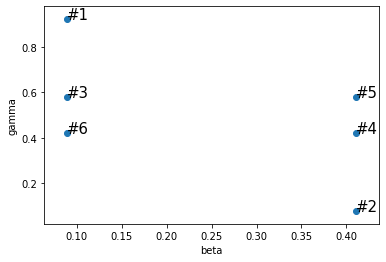

In [6]:
beta = [0.0896, 0.4102,0.0896,0.4102,0.4102,0.0896]
gamma = [0.9217,0.0780,0.5783,0.4220,0.5783,0.4220]
n = [str('#') + str(i) for i in range(1,7,1)]

plt.scatter(beta, gamma)
for i, txt in enumerate(n):
    plt.annotate(txt, (beta[i], gamma[i]), fontsize = 15)
plt.xlabel('beta')
plt.ylabel('gamma')

In [7]:
num_centers = 6
ratios =np.zeros((6,11,100))
pointer_matrix = np.zeros((6,11))
for i in range(num_centers):
  for j in range(0,len(g_list),1):
    graph = g_list[j]
    max_energy = max_energies[j]
    e = QAOA_energy(graph, [gamma[i]], [beta[i]])
    ev = int(10*even_percent(graph))
    pointer = int(pointer_matrix[i,ev])
    ratios[i][ev][pointer] = e/max_energy
    pointer_matrix[i,ev] +=1

In [8]:
av_matrix = np.zeros((6,11))
for i in range(6):
  for j in range(11):
    pointer = int(pointer_matrix[i][j])
    terms = []
    for k in range(pointer):
      terms.append(ratios[i][j][k])
    av_matrix[i][j] = np.mean(terms)

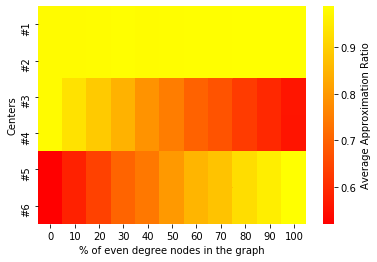

In [13]:
from pandas import DataFrame
df = DataFrame(av_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)
xticklabels = [str(i) for i in range(0,110,10)]
yticklabels = [str('#') + str(i) for i in range(1,7,1)]

ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels=xticklabels, yticklabels=yticklabels, cbar_kws={'label': 'Average Approximation Ratio'})
plt.xlabel("% of even degree nodes in the graph")
plt.ylabel("Centers")
#ax.tick_params(left=False, bottom=False) 
plt.savefig("fig_CentersApproxRatios.pdf", dpi = 1000)
plt.show()

In [10]:
gamma = []
beta = []
for i in range(len(g_data)):
    for j in range(len(g_data[i])):
        gamma.append(g_data[i][j][0] %1)
        beta.append(g_data[i][j][1] %0.5)

In [11]:
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize

Text(0.5, 0, '$\\beta/2\\pi$')

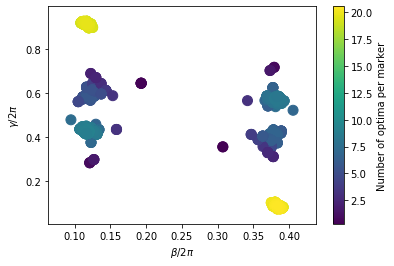

In [12]:
fig , ax = plt.subplots()
# Generate fake data
x__ = beta
y__ = gamma

# Calculate the point density
xy = np.vstack([x__,y__])
z = gaussian_kde(xy)(xy)

#fig, ax = plt.subplots()
ax.scatter(x__, y__, c=z, s=100)
#plt.colorbar()
# cbar = plt.colorbar(label = "Number of graph pairs per marker")



norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Number of optima per marker')



#####################
ax.set_ylabel(r"$\gamma/2\pi$")#, fontsize = 20)
ax.set_xlabel(r"$\beta/2\pi$")#, fontsize = 20)